In [2]:
import pandas as pd
import numpy as np

tw_df = pd.read_csv('tagged_data.csv')
tw_df.head()

,tweet,scores,tokens,length,absolutely_negative,very_negative,negative,neutral,positive,very_positive,perception
0,b'rt @mayelaabr: te odio cable onda',[ 0 0 -2 -2 0 0],"[""b'rt"", '@mayelaabr:', 'te', 'odio', 'cable',...",36.0,0.0,2.0,0.0,4.0,0.0,0.0,-2.0
1,b'rt @alegrebengali: colombia patria m\xc3\xad...,[ 0 0 0 0 0 -2 0 0 2 1 -3 0 0 -2 -1 ...,"[""b'rt"", '@alegrebengali:', 'colombia', 'patri...",188.0,2.0,4.0,2.0,8.0,2.0,2.0,2.0
2,b'rt @joshuav_delgado: prueba de fuego para ca...,[ 0 0 0 -2 0 0 0 0 0 0 -1 0 -2 -1 0 ...,"[""b'rt"", '@joshuav_delgado:', 'prueba', 'de', ...",175.0,0.0,4.0,4.0,8.0,0.0,0.0,-2.0
3,b'rt @irene_domingz: la mejor declaraci\xc3\xb...,[ 0 0 -1 2 0 -2 2 0 2 0 0 0],"[""b'rt"", '@irene_domingz:', 'la', 'mejor', 'de...",101.0,0.0,2.0,2.0,8.0,0.0,6.0,2.0
4,b'@moisesssedwin cable onda',[0 0 0],"[""b'@moisesssedwin"", 'cable', ""onda'""]",28.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [4]:
tw_df.drop(['tweet', 'scores', 'tokens'], axis=1)

,length,absolutely_negative,very_negative,negative,neutral,positive,very_positive,perception
0,36.0,0.0,2.0,0.0,4.0,0.0,0.0,-2.0
1,188.0,2.0,4.0,2.0,8.0,2.0,2.0,2.0
2,175.0,0.0,4.0,4.0,8.0,0.0,0.0,-2.0
3,101.0,0.0,2.0,2.0,8.0,0.0,6.0,2.0
4,28.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
194,98.0,2.0,2.0,2.0,10.0,0.0,2.0,-2.0
195,161.0,0.0,2.0,2.0,6.0,0.0,0.0,-2.0
196,161.0,4.0,4.0,4.0,16.0,2.0,2.0,-2.0
197,168.0,2.0,10.0,2.0,14.0,0.0,4.0,-2.0


In [5]:
features = ['length', 'absolutely_negative', 'very_negative', 'negative', 'neutral', 'positive', 'very_positive']
y = tw_df['perception']
X = tw_df[features]
X

,length,absolutely_negative,very_negative,negative,neutral,positive,very_positive
0,36.0,0.0,2.0,0.0,4.0,0.0,0.0
1,188.0,2.0,4.0,2.0,8.0,2.0,2.0
2,175.0,0.0,4.0,4.0,8.0,0.0,0.0
3,101.0,0.0,2.0,2.0,8.0,0.0,6.0
4,28.0,0.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...
194,98.0,2.0,2.0,2.0,10.0,0.0,2.0
195,161.0,0.0,2.0,2.0,6.0,0.0,0.0
196,161.0,4.0,4.0,4.0,16.0,2.0,2.0
197,168.0,2.0,10.0,2.0,14.0,0.0,4.0


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# Vamos a verificar cuál sería el mejor valor para k
k_range = range(1, 26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

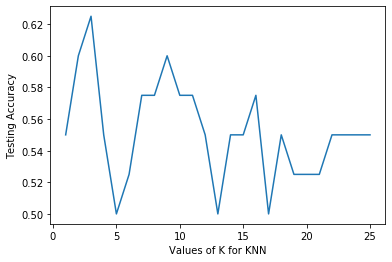

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range, scores_list)
plt.xlabel('Values of K for KNN')
plt.ylabel('Testing Accuracy')

In [10]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
classes = {-2: 'very negative', -1: 'negative', 0: 'neutral', 1: 'positive', 2: 'very positive'}
knnp = knn.predict(X_test)
knnp

array([-1., -2., -2., -2., -2.,  2., -2., -1.,  0., -2., -2., -2., -2.,
        0.,  2., -2.,  0.,  1., -2., -2., -2., -2., -2.,  2., -2.,  2.,
       -2., -1., -2., -2.,  0., -2., -2., -2.,  0., -2., -2., -2.,  2.,
        0.])

In [26]:
def ShowClass(prediction, classes):    
    predicted_classes = list()
    for value in prediction:
        predicted_classes.append(classes[value])
    print(predicted_classes)
ShowClass(knnp, classes)

['negative', 'very negative', 'very negative', 'very negative', 'very negative', 'very positive', 'very negative', 'negative', 'neutral', 'very negative', 'very negative', 'very negative', 'very negative', 'neutral', 'very positive', 'very negative', 'neutral', 'positive', 'very negative', 'very negative', 'very negative', 'very negative', 'very negative', 'very positive', 'very negative', 'very positive', 'very negative', 'negative', 'very negative', 'very negative', 'neutral', 'very negative', 'very negative', 'very negative', 'neutral', 'very negative', 'very negative', 'very negative', 'very positive', 'neutral']


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_curve
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score

    
def measuringPerformance(name, model, X, y, y_true, y_pred):    
    print("Measuring performance of: ", name)
    print("\n")
    
    # Cross validation score
    print("Cross validation score: ")
    print(cross_val_score(model, X, y, scoring="accuracy"))
    print('\n')
    
    # Confusion matrix
    y_train_predict = cross_val_predict(model, X, y, cv=3)
    print("Confusion matrix: ")
    print(confusion_matrix(y, y_train_predict))
    print('\n')
    
    # Precision and Recall
    print("Precision: ")
    print(precision_score(y, y_train_predict, average='micro'))
    print("Recall: ")
    print(recall_score(y, y_train_predict, average='micro'))
    print('\n')
    
    # Accuracy score
    print("Accuracy: ")
    print(accuracy_score(y_true, y_pred))
    print('\n')

    # F1 score
    print("F1 score: ")
    print(f1_score(y, y_train_predict, average='micro'))
    

measuringPerformance("Knn", knn, X_train, y_train, y_test, knnp)

Measuring performance of:  Knn


Cross validation score: 
[0.5       0.46875   0.40625   0.4375    0.4516129]


Confusion matrix: 
[[64  3  7  0  4]
 [12  0  2  1  0]
 [17  0  2  3  4]
 [15  0  1  1  2]
 [14  2  2  1  2]]


Precision: 
0.4339622641509434
Recall: 
0.4339622641509434


Accuracy: 
0.5


F1 score: 
0.43396226415094347


In [35]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
svc = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)

/home/brian02oriel/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/brian02oriel/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/brian02oriel/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/brian02oriel/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/brian02oriel/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increa

In [36]:
svcp = svc.predict(X_test)
ShowClass(svcp, classes)

['very positive', 'neutral', 'very negative', 'very negative', 'very negative', 'positive', 'very negative', 'positive', 'positive', 'very negative', 'very negative', 'positive', 'very negative', 'very negative', 'positive', 'very negative', 'positive', 'positive', 'very negative', 'very negative', 'very negative', 'very negative', 'very negative', 'positive', 'very negative', 'very positive', 'very negative', 'positive', 'very negative', 'very negative', 'positive', 'very negative', 'very negative', 'very positive', 'very negative', 'positive', 'positive', 'very negative', 'positive', 'positive']


In [37]:
measuringPerformance("SVM", svc, X_train, y_train, y_test, svcp)

Measuring performance of:  SVM


Cross validation score: 


/home/brian02oriel/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/brian02oriel/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/brian02oriel/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/brian02oriel/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/brian02oriel/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increa

[0.59375    0.46875    0.25       0.28125    0.70967742]


Confusion matrix: 
[[38  3 20 16  1]
 [ 1  2  7  4  1]
 [ 2  0 18  4  2]
 [ 1  1  5  7  5]
 [ 1  0  6  6  8]]


Precision: 
0.4591194968553459
Recall: 
0.4591194968553459


Accuracy: 
0.575


F1 score: 
0.4591194968553459


/home/brian02oriel/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/brian02oriel/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/brian02oriel/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/brian02oriel/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/brian02oriel/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increa

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [39]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None],
    
}


def display(parameters):
    cv = GridSearchCV(rf,parameters,cv=5)
    cv.fit(X_train,y_train)
    
    print(f'Best parameters are: {cv.best_params_}')
    print("\n")
    #mean_score = results.cv_results_['mean_test_score']
    #std_score = results.cv_results_['std_test_score']
    #params = results.cv_results_['params']
    #for mean,std,params in zip(mean_score,std_score,params):
    #    print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

display(parameters)

Best parameters are: {'max_depth': 32, 'n_estimators': 100}




In [40]:
rf = RandomForestClassifier(max_depth= 32, n_estimators= 100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=32, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
rfp = rf.predict(X_test)
ShowClass(rfp, classes)

['very positive', 'neutral', 'very negative', 'very negative', 'very negative', 'very positive', 'very negative', 'very negative', 'very positive', 'very negative', 'very negative', 'very positive', 'very negative', 'very negative', 'very positive', 'very negative', 'positive', 'neutral', 'very negative', 'very negative', 'very negative', 'very negative', 'very negative', 'positive', 'very negative', 'very positive', 'very negative', 'very negative', 'very negative', 'very negative', 'very positive', 'very negative', 'very negative', 'positive', 'very negative', 'neutral', 'neutral', 'very negative', 'neutral', 'neutral']


In [42]:
measuringPerformance("Random Forest", rf, X_train, y_train, y_test, rfp)

Measuring performance of:  Random Forest


Cross validation score: 
[0.625      0.625      0.6875     0.59375    0.70967742]


Confusion matrix: 
[[63  3 11  1  0]
 [12  3  0  0  0]
 [11  0 10  3  2]
 [ 8  0  4  5  2]
 [ 2  1  2  3 13]]


Precision: 
0.5911949685534591
Recall: 
0.5911949685534591


Accuracy: 
0.775


F1 score: 
0.5911949685534591


In [43]:
from joblib import dump
dump(rf, 'model.joblib')


['model.joblib']